In [15]:
#Question 1 - numbers.txt

In [16]:
#I have successfully tested this code with a similarly formatted list of my own creation. It still works.
#In theory it can handle any number of lines of comma seperated values and any magnitude of values.
#Though the visualizations get pretty busy if the greatest number is too large.

import matplotlib.pyplot as plt #importing
import numpy as np
import json

f = open("numbers.txt", "r") #opening the list - read only

nums = [] #spinning up empty lists and dict
numsList = []
numsCountDict = {}

for x in f: #turn from file to strings, each of which is a full line from the file
    nums.append(x)

for line in nums: #turn from line strings into ints in a list
    x = line.split(',') #needed a way to deliniate based on commas, searched Python documentation
    for y in x:
        z = int(y) #Just doing a quick type conversion
        numsList.append(z) #Then appending to the overall list of numbers

print("Here's a list of the numbers from the file:")
print(numsList) #for diagnostic purposes

largestNum = 0 #need to know how many buckets I need to iterate through, so finding largest number in the list
for x in numsList: #using this loop
    if x > largestNum:
        largestNum = x
        
print() #These empty prints are just a way of doing convenient line breaks
print("Largest number for range purposes is",largestNum) #for diagnostic purposes
print()

#This next loop counts up the instances of each number in a range given by largest num
#And then appends that count into the Dictionary from earlier
for currentVal in range(0,(largestNum+1)):
    numCount = 0
    for x in numsList:
        if x == currentVal:
            numCount += 1
    numsCountDict.update({currentVal:numCount})

print("Here's the counts of each number:")
for k,v in numsCountDict.items(): #for loop to print the counts of each number
    print("Count of",k,"is",v)
print()

print("These counts are stored in this dictionary:")
print(numsCountDict)

Here's a list of the numbers from the file:
[2, 4, 6, 8, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6, 0, 1, 3, 5, 6, 7, 8, 9, 10, 2, 3, 6, 8, 9, 10, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6, 0, 1, 3, 5, 6, 7, 8, 9, 10, 2, 3, 6, 8, 9, 10, 2, 4, 6, 8, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6, 0, 1, 3, 5, 6, 7, 8, 9, 10, 2, 3, 6, 8, 9, 10, 6, 7, 4, 3, 6, 8, 4, 5, 2, 10, 3, 7, 9, 6, 0, 1, 3, 5, 6, 7, 8, 9, 10, 2, 3, 6, 8, 9, 10, 2, 4, 6, 8, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 2, 4, 6, 8, 4, 5, 2, 1, 9, 0, 4, 6, 7, 4, 3, 2, 1, 9, 10, 3, 7, 9, 6]

Largest number for range purposes is 10

Here's the counts of each number:
Count of 0 is 9
Count of 1 is 14
Count of 2 is 19
Count of 3 is 20
Count of 4 is 22
Count of 5 is 10
Count of 6 is 26
Count of 7 is 17
Count of 8 is 13
Count of 9 is 24
Count of 10 is 14

These counts are stored in this dictionary:
{0: 9, 1: 14, 2: 19, 3: 20, 4: 22, 5: 10, 6: 26, 7: 17, 8: 13, 9: 24,

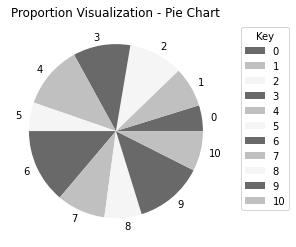

In [17]:
#Here are my plots for displaying the data
#I would do subplots, but Jupyter is unreliable at formatting the rendering and keeps putting them on top of each other.
#So I'm just going to do one graph in each of three cells.

#plt.subplot(1,3,1)
plt.pie(numsCountDict.values(), labels = numsCountDict.keys(), colors = ('dimgray','silver','whitesmoke'))
plt.legend(bbox_to_anchor=(1.05,1.0),loc = 'upper left', title = 'Key')
plt.title("Proportion Visualization - Pie Chart")

plt.show()

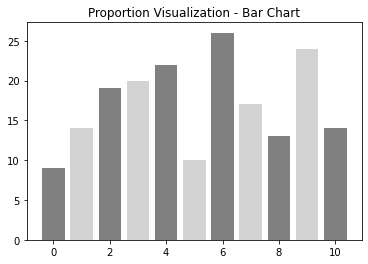

In [18]:
#subplot(1,3,2)
plt.bar(numsCountDict.keys(),numsCountDict.values(), color = ('gray','lightgray'))
plt.title("Proportion Visualization - Bar Chart")

plt.show()

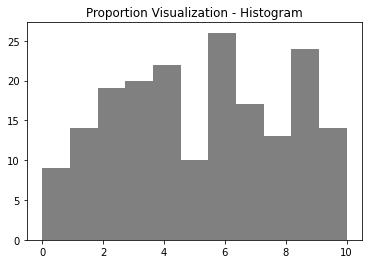

In [19]:
#subplot(1,3,3)
plt.hist(numsList, color = ('gray'), bins = (largestNum+1))
plt.title("Proportion Visualization - Histogram")
plt.show()

In [20]:
#Doing the JSON conversion/saving now
with open("Midterm1Output.json", "w") as out: #This sends it to C:\users\tyab on my desktop (and the same on my laptop)
                                                #which is on my local computer
    json.dump(numsCountDict, out)
print("Json sent to Jupyter folder.")

Json sent to Jupyter folder.


In [21]:
#Question 2 - Amazon Data Analysis
#Using the Amazon Sample Dataset from Blackboard because Amazon is not pulling the report properly.

In [22]:
import statistics as stats
import pandas as pd #importing needed packages

amazonOrders = pd.read_csv('amazon-orders.csv') #Loading the file

#Fundamentally I care about time and total charged - the next part of this box reformats total charged to work right
amazonOrders["Total Charged"] = amazonOrders["Total Charged"].str.replace('$','').astype(float)
#^This above line often throws a "this will be depreciated" error but works anyways
#It converts the strings for total charged into a float by removing the $ and changing the type

#Changing date formatting to work on it
amazonOrders['Order Date'] = pd.to_datetime(amazonOrders['Order Date'])

##amazonOrders.head() #learned from the tutorial page for pulling the Amazon data - for diagnostic use

#Pulling some overall statistics and printing them out
TotalList = [] #necessary for the STDEV command - needs to look at a list
for x in amazonOrders["Total Charged"]:
    TotalList.append(x)
    
TotalSD = stats.stdev(TotalList)
TotalHighest = amazonOrders["Total Charged"].max() #highest order cost overall
TotalLowest = amazonOrders["Total Charged"].min() #lowest order cost overall
TotalMedian = amazonOrders["Total Charged"].median() #median order cost overall
TotalMean = amazonOrders["Total Charged"].mean() #mean order cost overall

#Printing the statistics calculated above
print("Overall statistics:")
print("The most expensive order is",TotalHighest)
print("The least expensive order is",TotalLowest)
print("The median order amount is",TotalMedian)
print("The mean order amount is",TotalMean)
print("The standard deviation within the overall set is",TotalSD)

Overall statistics:
The most expensive order is 210.99
The least expensive order is 1.04
The median order amount is 15.95
The mean order amount is 30.131016949152542
The standard deviation within the overall set is 36.42273246651456


C:\Users\tyab\AppData\Local\Temp/ipykernel_17712/3295016069.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazonOrders["Total Charged"] = amazonOrders["Total Charged"].str.replace('$','').astype(float)


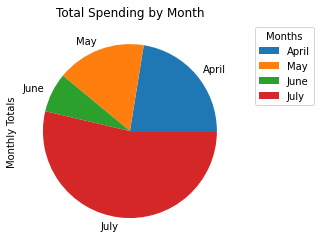

In [23]:
#This cell creates my first graph - spending by month.
monthlyTotals = amazonOrders.groupby(amazonOrders['Order Date'].dt.month).sum()["Total Charged"]

monthlyTotals.plot.pie(labels = ('April','May','June','July'), ylabel = 'Monthly Totals')
plt.legend(bbox_to_anchor=(1.05,1.0),loc = 'upper left', title = 'Months')

plt.title("Total Spending by Month")

plt.show()

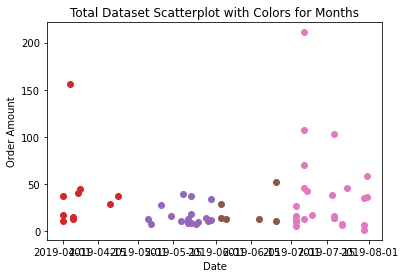

Here are the summary statistics for the included months and the sample excluded (Jan):
Highest amounts are:
nan for January, 156.12 for April, 38.89 for May, 51.99 for June, and 210.99 for July.
Lowest amounts are:
nan for January, 9.99 for April, 7.6 for May, 10.59 for June, and 1.04 for July.
Medians are:
nan for January, 32.865 for April, 12.285 for May, 13.260000000000002 for June, and 16.46 for July.
And means are:
nan for January, 39.917 for April, 16.337777777777777 for May, 21.724999999999998 for June, and 38.165200000000006 for July.

And here are some graphs:


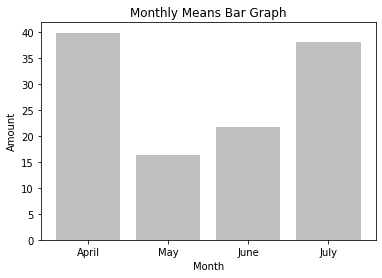

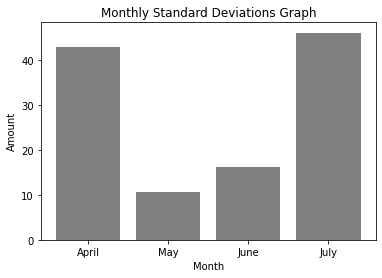

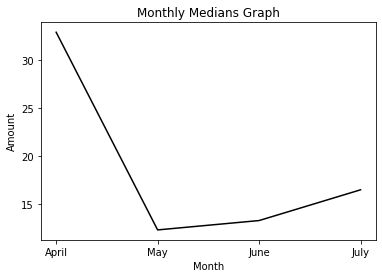

In [30]:
#These commands create individual monthly dataframes out of the dataframe:
amazonOrdersJanuary = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 1]
amazonOrdersFebruary = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 2]
amazonOrdersMarch = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 3]
amazonOrdersApril = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 4]
amazonOrdersMay = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 5]
amazonOrdersJune = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 6]
amazonOrdersJuly = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 7]
amazonOrdersAugust = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 8]
amazonOrdersSeptember = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 9]
amazonOrdersOctober = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 10]
amazonOrdersNovember = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 11]
amazonOrdersDecember = amazonOrders.loc[amazonOrders['Order Date'].dt.month == 12]

#Which we can now use for monthly statistics and plots.

#Example:
#Scatter plot with different colors for different months
#January
plt.scatter(x = amazonOrdersJanuary['Order Date'],y = amazonOrdersJanuary['Total Charged'])
#February
plt.scatter(x = amazonOrdersFebruary['Order Date'],y = amazonOrdersFebruary['Total Charged'])
#March
plt.scatter(x = amazonOrdersMarch['Order Date'],y = amazonOrdersMarch['Total Charged'])
#April
plt.scatter(x = amazonOrdersApril['Order Date'],y = amazonOrdersApril['Total Charged'])
#May
plt.scatter(x = amazonOrdersMay['Order Date'],y = amazonOrdersMay['Total Charged'])
#June
plt.scatter(x = amazonOrdersJune['Order Date'],y = amazonOrdersJune['Total Charged'])
#July
plt.scatter(x = amazonOrdersJuly['Order Date'],y = amazonOrdersJuly['Total Charged'])
#August
plt.scatter(x = amazonOrdersAugust['Order Date'],y = amazonOrdersAugust['Total Charged'])
#September
plt.scatter(x = amazonOrdersSeptember['Order Date'],y = amazonOrdersSeptember['Total Charged'])
#October
plt.scatter(x = amazonOrdersOctober['Order Date'],y = amazonOrdersOctober['Total Charged'])
#November
plt.scatter(x = amazonOrdersNovember['Order Date'],y = amazonOrdersNovember['Total Charged'])
#December
plt.scatter(x = amazonOrdersDecember['Order Date'],y = amazonOrdersDecember['Total Charged'])

plt.title("Total Dataset Scatterplot with Colors for Months")
plt.xlabel("Date")
plt.ylabel('Order Amount')
plt.show()

##########################################################################################################

#This next part calculates and plots the summary statistics for each month.
#I've ommitted the code for the other 7 months for visibility's sake - it's exactly the same but with the month names changed
#January is included to demonstrate how I'm handling months without data.
#But including the other months would do nothing but clutter up the code with the sample dataset
#so I'm choosing to exclude them for the convenience of all involved, since this is already a ~250 line box

TotalHighestJanuary = amazonOrdersJanuary["Total Charged"].max() #highest order cost overall for April
TotalLowestJanuary = amazonOrdersJanuary["Total Charged"].min() #lowest order cost overall for April
TotalMedianJanuary = amazonOrdersJanuary["Total Charged"].median() #median order cost overall for April
TotalMeanJanuary = amazonOrdersJanuary["Total Charged"].mean() #mean order cost overall for April

TotalHighestApril = amazonOrdersApril["Total Charged"].max() #highest order cost overall for April
TotalLowestApril = amazonOrdersApril["Total Charged"].min() #lowest order cost overall for April
TotalMedianApril = amazonOrdersApril["Total Charged"].median() #median order cost overall for April
TotalMeanApril = amazonOrdersApril["Total Charged"].mean() #mean order cost overall for April

TotalHighestMay = amazonOrdersMay["Total Charged"].max() #highest order cost overall for May
TotalLowestMay = amazonOrdersMay["Total Charged"].min() #lowest order cost overall for May
TotalMedianMay = amazonOrdersMay["Total Charged"].median() #median order cost overall for May
TotalMeanMay = amazonOrdersMay["Total Charged"].mean() #mean order cost overall for May

TotalHighestJune = amazonOrdersJune["Total Charged"].max() #highest order cost overall for June
TotalLowestJune = amazonOrdersJune["Total Charged"].min() #lowest order cost overall for June
TotalMedianJune = amazonOrdersJune["Total Charged"].median() #median order cost overall for June
TotalMeanJune = amazonOrdersJune["Total Charged"].mean() #mean order cost overall for June

TotalHighestJuly = amazonOrdersJuly["Total Charged"].max() #highest order cost overall for July
TotalLowestJuly = amazonOrdersJuly["Total Charged"].min() #lowest order cost overall for July
TotalMedianJuly = amazonOrdersJuly["Total Charged"].median() #median order cost overall for July
TotalMeanJuly = amazonOrdersJuly["Total Charged"].mean() #mean order cost overall for July

######################################################################################################
#This next part creates the lists needed to generate graphs

#First, the presence of data for each month is set to 0 (IE: No data)
January = 0
April = 0
May = 0
June = 0
July = 0

#Each of these monthly loops creates a total list for the month needed for standard deviation calculation
JanuaryTotalList = []
for x in amazonOrdersJanuary["Total Charged"]:
    JanuaryTotalList.append(x)
if len(JanuaryTotalList) > 0: 
    January = 1 #sets the tracker variable to one if there is data for the month
if len(JanuaryTotalList) > 1:
    sdJanuary = stats.stdev(JanuaryTotalList) #and then calculates an SD if possible

AprilTotalList = [] #all of these work the same way - the only difference is that the month name is changed.
for x in amazonOrdersApril["Total Charged"]:
    AprilTotalList.append(x)
if len(AprilTotalList) > 0:
    April = 1
if len(AprilTotalList) > 1:
    sdApril = stats.stdev(AprilTotalList)

MayTotalList = []
for x in amazonOrdersMay["Total Charged"]:
    MayTotalList.append(x)
if len(MayTotalList) > 0:
    May = 1
if len(MayTotalList) > 1:
    sdMay = stats.stdev(MayTotalList)

JuneTotalList = []
for x in amazonOrdersJune["Total Charged"]:
    JuneTotalList.append(x)
if len(JuneTotalList) > 0:
    June = 1
if len(JuneTotalList) > 1:
    sdJune = stats.stdev(JuneTotalList)

JulyTotalList = []
for x in amazonOrdersJuly["Total Charged"]:
    JulyTotalList.append(x)
if len(JulyTotalList) > 0:
    July = 1
if len(JulyTotalList) > 1:
    sdJuly = stats.stdev(JulyTotalList)                     
                     
MeansCombined = [] #These new lists and sets of if statements add the monthly statistics to the lists used for the graph
if January == 1: #As long as the month actually has data - so the ifs are false for Jan, and true for the other months
    MeansCombined.append(TotalMeanJanuary) #which stops the graphs from having blank space unnecessarily
if April == 1:
    MeansCombined.append(TotalMeanApril)
if May == 1:
    MeansCombined.append(TotalMeanMay)
if June == 1:
    MeansCombined.append(TotalMeanJune)
if July == 1:
    MeansCombined.append(TotalMeanJuly)
    
MediansCombined = [] #All of these blocks work exactly the same way - the only changes are the names
if January == 1:
    MediansCombined.append(TotalMedianJanuary)
if April == 1:
    MediansCombined.append(TotalMedianApril)
if May == 1:
    MediansCombined.append(TotalMedianMay)
if June == 1:
    MediansCombined.append(TotalMedianJune)
if July == 1:
    MediansCombined.append(TotalMedianJuly)

HighestCombined = []
if January == 1:
    HighestCombined.append(TotalHighestJanuary)
if April == 1:
    HighestCombined.append(TotalHighestApril)
if May == 1:
    HighestCombined.append(TotalHighestMay)
if June == 1:
    HighestCombined.append(TotalHighestJune)
if July == 1:
    HighestCombined.append(TotalHighestJuly)

LowestCombined = []
if January == 1:
    LowestCombined.append(TotalLowestJanuary)
if April == 1:
    LowestCombined.append(TotalLowestApril)
if May == 1:
    LowestCombined.append(TotalLowestMay)
if June == 1:
    LowestCombined.append(TotalLowestJune)
if July == 1:
    LowestCombined.append(TotalLowestJuly)

sdCombined = []
sdMonthsList = []
if len(JanuaryTotalList) > 1: #This needs to check if length is at least 2 because that's needed for SD
    sdCombined.append(sdJanuary) #So this block only appends if len > 1, and creates a seperate sdMonthsList
    sdMonthsList.append('January') #Which is needed to avoid an error if there is a month with len 1
if len(AprilTotalList) > 1:
    sdCombined.append(sdApril)
    sdMonthsList.append('April')
if len(MayTotalList) > 1:
    sdCombined.append(sdMay)
    sdMonthsList.append('May')
if len(JuneTotalList) > 1:
    sdCombined.append(sdJune)
    sdMonthsList.append('June')
if len(JulyTotalList) > 1:
    sdCombined.append(sdJuly)
    sdMonthsList.append('July')

MonthsList = []
if January == 1:
    MonthsList.append('January')
if April == 1:
    MonthsList.append('April')
if May == 1:
    MonthsList.append('May')
if June == 1:
    MonthsList.append('June')
if July == 1:
    MonthsList.append('July')
    
############################################################################################

#This code prints the monthly statistics
print('Here are the summary statistics for the included months and the sample excluded (Jan):')
print("Highest amounts are:")
print(TotalHighestJanuary,"for January,",TotalHighestApril,"for April,",TotalHighestMay,"for May,",TotalHighestJune,"for June, and",TotalHighestJuly,"for July.")
print("Lowest amounts are:")
print(TotalLowestJanuary,"for January,",TotalLowestApril,"for April,",TotalLowestMay,"for May,",TotalLowestJune,"for June, and",TotalLowestJuly,"for July.")
print("Medians are:")
print(TotalMedianJanuary,"for January,",TotalMedianApril,"for April,",TotalMedianMay,"for May,",TotalMedianJune,"for June, and",TotalMedianJuly,"for July.")
print("And means are:")
print(TotalMeanJanuary,'for January,',TotalMeanApril,"for April,",TotalMeanMay,"for May,",TotalMeanJune,"for June, and",TotalMeanJuly,"for July.")
print()
print("And here are some graphs:")

#And the following code creates graphs
#Bar graph - means
plt.bar(MonthsList,MeansCombined, color = 'silver')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.title('Monthly Means Bar Graph')
plt.show()

#Bar graph - standard deviations
plt.bar(sdMonthsList,sdCombined, color = 'grey') #uses the sdMonthsList from earlier
plt.ylabel('Amount')
plt.xlabel('Month')
plt.title('Monthly Standard Deviations Graph')
plt.show()

#Line chart - medians
plt.plot(MonthsList, MediansCombined, color = 'black')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.title('Monthly Medians Graph')
plt.show()

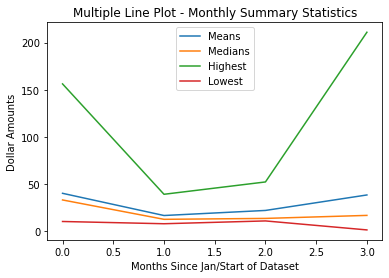

In [25]:
#Multiple Line Plot - Putting the different monthly statistics all together
plt.plot(MeansCombined, label = 'Means')
plt.plot(MediansCombined, label = 'Medians')
plt.plot(HighestCombined, label = 'Highest')
plt.plot(LowestCombined, label = 'Lowest')
plt.title("Multiple Line Plot - Monthly Summary Statistics")
plt.xlabel("Months Since Jan/Start of Dataset")
plt.ylabel('Dollar Amounts')
plt.legend()
plt.show()